In [1]:
# In previous section we saw how to access/modify portions of arrays
# Ex. arr[0], arr[:5], arr[arr > 0]
# This section will cover another style called fancy indexing
# Similar to the simple indexing we have seen, but we pass arrays of indicies in place of single scalars
# Allows us to very quickly access/modify complicated subsets of an array's values
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
# Considering the above array, suppose we want to access 3 different elements
# We could do it like this:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
# Or, we can pass a single list or array of indicies to get the same result
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [4]:
# With fancy indexing, shape of the result reflects the shape of the INDEX ARRAYS rather than the shape of the ARRAY BEING INDEXED
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
# Fancy indexing also works in multi-D
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
# Like with standard indexing, the first index refers to the row and the second to the column
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [ ]:
# The first element is X[0, 2], 2nd is X[1, 1], and the 3rd is X[2, 3]

In [8]:
# For more powerful operations, fancy indexing can be combined with other indexing schemes
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [9]:
# We can combine fancy and simple indicies
X[2, [2, 0, 1]]

array([10,  8,  9])

In [10]:
# Here, its X[2, 2], X[2, 0], and X[2, 1]
# We can also combine fancy indexing with slicing
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [11]:
# Here, its X[1, 2], X[1, 0], X[1, 1]
#           X[2, 2], X[2, 0], X[2, 1]
# And we can combine fancy indexing with masking
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [12]:
# Ex. Selecting random points
# Common use of fancy indexing is the selection of subsets of rows from a matrix
# For example, might have N x D matrix (N=points in D dimensions) such as the following points drawn from a 2D normal distribution below
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100L, 2L)

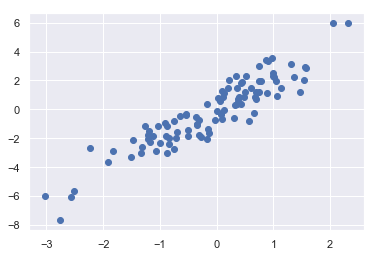

In [13]:
# Using plotting tools we will discuss later, we can visualize these points as a scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1]);

In [16]:
# Lets use fancy indexing to select 20 random points 
# We will do this by first choosing 20 random indicies with no repeats and use these indicies to select a portion or the original array
indicies = np.random.choice(X.shape[0], 20, replace=False)
indicies

array([38, 53, 16, 22, 36, 78, 57, 72,  4, 54, 21, 23, 34, 89, 43, 69, 24,
       65, 87, 81], dtype=int64)

In [17]:
selection = X[indicies] # Fancy indexing used here
selection.shape

(20L, 2L)

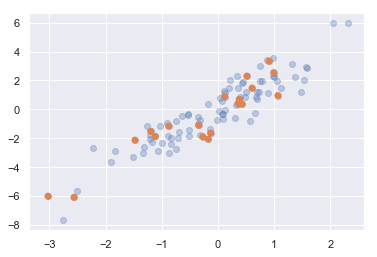

In [42]:
# Now, to see which points were selected, let's over-plot large circles at the locations of the selected points
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], edgecolors='none', s=50);

In [ ]:
# This technique is often used to quickly partition datasets
# Often needed in train/test splitting for validation of statistical models

In [43]:
# Fancy indexing can also be used to modify parts of an array
# Ex. Imagine we have an array of indicies and we'd like to set the corresponding items in an array to some value
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [44]:
# We can use any assignment type operator for this:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [45]:
# Although, repeated indicies with these operations can cause some potentially unexpected results:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [46]:
# A we can see the 4 dissappeared
# This operation first assigns x[0] = 4, then assisgns x[0] = 6, resulting in x[0] having 6 as its value
# Now consider this operation:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [48]:
# We might expect x[3] = 2 and x[4] = 3 since this is how many times its repeated
# This is not the case since conceptually x[i] += 1 is meant as a shorthand for x[i] = x[i] + 1
# x[i] + 1 is evaluated, and then the result is assigned to the indicies in x
# So basically, all the computations are done FIRST and THEN assigned to the indicies
# Therefore, it is not the augmentation that happens multiple times, bu the assignment itself, leading to nonintuitive results
# If we want the other behaviour, we can use the at() methodof ufuncs:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [ ]:
# This method does an in-place application of the given operator at the specified indicies (i) with the specified value (1)

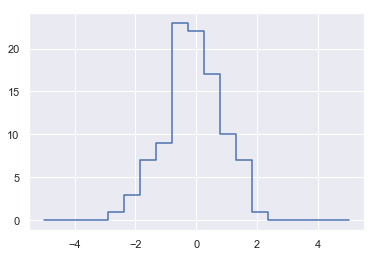

In [53]:
# Ex. Binning Data
# Can use these ideas to efficiently bin data to create a histogram by hand
# Ex. We have 1000 values and would like to quickly find where they fall within an array of bins

# Could compute using a ufunc.at like this:
np.random.seed(42)
x = np.random.randn(100) # Here we return 100 random floats from a univariate normal dist. with mean 0 and variance 1

# Compute histogram by hand
bins = np.linspace(-5, 5, 20) # Here we create 20 evenly spaced out numbers from -5 to 5
counts = np.zeros_like(bins) # Here, we create an array of zeros the same size as bins

# Find appropriate bin for each x
i = np.searchsorted(bins, x)

# Add 1 to each of these bins
np.add.at(counts, i, 1)

# The count now reflect the number of points within each bin, in other words a histogram
plt.plot(bins, counts, linestyle='steps')

In [54]:
# Of course, it would be silly to do this each time that you want to plot a histogram
# This is why Matplotlib uses the np.histogram function which does a very similar computation
# Lets compare the 2 ways:
print("NumPy routine: ")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine: ")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine: 
The slowest run took 76.59 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15.2 µs per loop
Custom routine: 
The slowest run took 4.84 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.62 µs per loop


In [55]:
# Our own one-line algorithm is faster than the optimized algorithm in NumPy
# Why? Well, if we dig into np.histogram source code, its quite a bit more involved than a simple search-and-count that we have done
# This is because NumPy's algorithm is more flexible and is designed for better performance with big data sets
x = np.random.randn(1000000)
print("NumPy routine: ")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine: ")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine: 
10 loops, best of 3: 50.7 ms per loop
Custom routine: 
10 loops, best of 3: 82.7 ms per loop


In [ ]:
# This shows that algorithm efficiency is almost never a simple question
# Algorithm efficient for large datasets will not always be the best choice for small data sets and vice versa
# Advantage of coding the algorithm ourselves is that with an understanding of the basic methods, we could use these building blocks to extend this to do some very interesting custom behaviours
# Key to using Python in data-intensive applications is knowing about general convenience routines like np.histogram and when they are appropriate
# Also knowing how to make use of lower level functionality when you need more pointed behaviour